# Introduction to models

With normal programming, we have:

Rules + Input   -> Output

With machine learning, we have:

Input + Expected Output -> Rules.

This notebook runs through a very simple machine learning algorithm: Linear Regression.

## My First Model: Linear Regression

### The problem

In the file `cluster.csv`, there are measurements of how many emails were processed in an hour by a cluster of `n` cores. We want to find out how much capacity we gain per core added.

In other words, we want to find `w` such that:

`emails_processed = w * number_of_cores`.

This is an example of a _regression problem_.

Given `X` number of cores, predict `y`, the number of emails processed.

### Setting up

We first use the `pandas` package to load our data. `pandas`, and `numpy` are essential packages for data management in machine learning with python. You can see some cheat sheets for these packages here:

[pandas](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

[numpy](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

In [91]:
import pandas as pd
cluster = pd.read_csv('cluster.csv')
cluster.head()

,cores,emails_processed,hour
0,1,237,1
1,1,233,2
2,1,230,3
3,1,237,4
4,1,225,5


It's good practice to always plot our data:

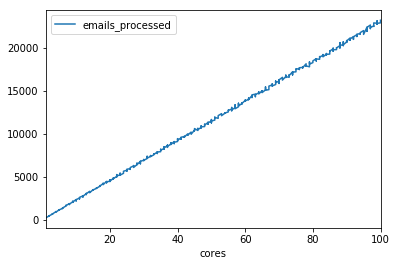

In [57]:
import matplotlib.pyplot as plt

cluster.plot(x='cores',y='emails_processed')
plt.show()

Our data follows a clear linear trend!

### Preprocessing Data

Machine learning models train better if the data is _standardized_. (i.e. inputs and outputs are between 0 and 1).

To standardize our data, we can use the StandardScaler() function from scikit-learn.

In [123]:
from sklearn.preprocessing import StandardScaler

X = cluster[['cores']]
y = cluster[['emails_processed']]
x_scale = StandardScaler()
X = x_scale.fit_transform(X)
y_scale = StandardScaler()
y = y_scale.fit_transform(y)

It's a good idea to divide our data into _training_ and _test_ sets.

We also divide it up into predictors _X_ and predicted _y_.

We can use the helper function train_test_split to shuffle our data and allocate 20% of it to testing.


In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Training

In machine learning, our data is always noisy. And small changes in our data (or random seed!) will yield a different model.


Model training works by minimizing a _loss function_. The loss function  measures how inaccurate our model is. 

For this problem, we will use the mean squared error loss function

`MSE = (emails_processed - w*cores)^2`.

Keras has an optimizer that will find the values that minimize the loss.

In [125]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(units=1,kernel_initializer='uniform',\
                activation='linear',input_dim=1))
model.compile(loss='mean_squared_error', optimizer='adagrad')

model.fit(X_train, y_train, epochs=2000,verbose=0)
score = model.evaluate(X_test,y_test)
print(score)

100/100 [==============================] - 0s 2ms/step
0.000276026998763


### Interpreting model output

We now how to decode the predictions made by our model. We can do this with the `inverse_transform` method.

For, e.g. analysis of images, we would write a rendering function.

In [137]:
cluster['predicted_emails_processed'] = y_scale.inverse_transform(model.predict(X))

### Evaluating the model

In [136]:
cluster

,cores,emails_processed,hour,predicted_emails_process
0,1,238.327484,1,238.327484
1,1,238.327484,2,238.327484
2,1,238.327484,3,238.327484
3,1,238.327484,4,238.327484
4,1,238.327484,5,238.327484
5,2,468.101898,1,468.101898
6,2,468.101898,2,468.101898
7,2,468.101898,3,468.101898
8,2,468.101898,4,468.101898
9,2,468.101898,5,468.101898


# Multiple Linear Regression
